## Simulate the sandpile model with 2 random neighbours

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

Define the sandpile model below

In [2]:
def sandpile_model(initial_state, max_value=1, yield_all=False, grain_add_method='random'):
    nx, ny = initial_state.shape
    state = initial_state.copy()

    # execute topplings (if any)
    while True:
        
        # Initialize placeholder for avalanche size
        avalanche_size = 0
        
        while True:
            
            # create a zero-padded copy of state so we don't
            # need to worry about the edges
            # CHECK THIS OUT
            state_padded = np.pad(state, 1, 'constant', constant_values=0)

            # Chech if excited sites are present
            is_above_threshold = state_padded > max_value

            if not np.any(is_above_threshold):
                break

            # Find the excited site
            i, j = np.where(is_above_threshold)
            
            # Remove grains from the excited site
            state_padded[i, j] -= 2
            
            # Assing sand randomly twice
            for _ in range(2):
                
                # Determine whether to move vertically or horizontally
                ver_ho = np.random.randint(0,2)
                
                # Determine the direction to move
                direction = 2*np.random.randint(0,2) - 1
                
                # Vertically
                if ver_ho == 0:
                    state_padded[i, j + direction] += 1
                    
                # Horizontally
                elif ver_ho == 1:
                    state_padded[i + direction, j] += 1

            # Add avalance number
            avalanche_size += np.count_nonzero(is_above_threshold)
            
            # Remove padding
            state = state_padded[1:-1, 1:-1]
            
            if yield_all:
                yield state, None

        # Add grains at random sites
        if grain_add_method == 'random':
            i, j = np.random.randint(nx), np.random.randint(ny)
        
        # Only add grains at the edge of the system
        elif grain_add_method == 'edge':
            
            ver_ho2 = np.random.randint(0,2)
            
            # Vertical
            if ver_ho2 == 0:
                
                # Either on the left or right
                j = nx*np.random.randint(0,2) - 1
                
                # Row number
                i = np.random.randint(nx)
                
            # Horizontal
            elif ver_ho2 == 1:
                
                # Either at the top or bottom
                i = ny*np.random.randint(0,2) - 1
                
                # Columnnumber
                j = np.random.randint(ny)
            
        state[i, j] += 1
        
        yield state, avalanche_size

### Q1

*Implement the sandpile model on an $50 \times 50$ lattice and plot avalanche size as a function of time*

Run the system and record avalanche sizes

In [3]:
# Initialize an empty lattice
initial_state = np.zeros((25, 25), dtype=int)
state_generator = sandpile_model(initial_state, grain_add_method = 'random')

# Keep track of avalanche sizes
iterations = 2000
avalanches = []

for state, avalanche_size in state_generator:
    if avalanche_size > 0:
        avalanches.append(avalanche_size)

    if len(avalanches) > iterations-1:
        break

Plot the resulting time series of avalanche sizes

In [4]:
# Define x values for the plot
x_vals = range(iterations)

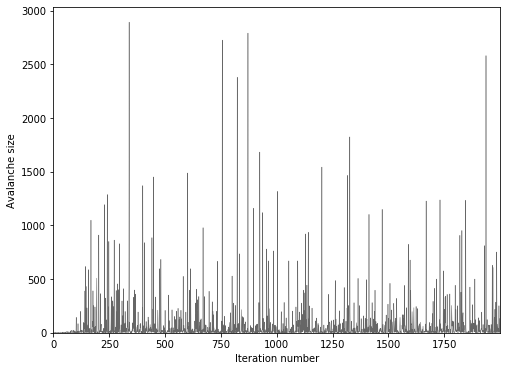

In [11]:
# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_vals, avalanches, color = '0.4', linewidth = 0.5)

# Plot settingx
ax.set_xlabel('Iteration number')
ax.set_ylabel('Avalanche size')
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0)

plt.show()